In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
optimization_config = {
    'eval_budget': 50
}
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

#COLORS = ['green','red', 'yellow', 'orange', 'blue', 'black']
#COLORS = [(0.0, 0.63, 0.53),(0.90,0.29,0.21), (0.87, 0.56, 0.27), (0.30, 0.73, 0.84), (0.39, 0.09, 0.47), (0.22, 0.31, 0.33)]
COLORS = ['#008280FF', '#BB0021FF', '#808180FF', '#3B4992FF', '#631879FF', '#5F559BFF']
HATCHES = ['', '', '', '','','']
from matplotlib import rcParams
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Times']
LABELSIZE= 8 #8.97 * 0.67 #8 #5 #8.97*0.67
WIDTH  = 8.43/2.54*0.9  # in inch
HEIGHT = WIDTH / 1.618
LINEWIDTH = 1.0 
import matplotlib as mpl
mpl.use('pdf')
FONTDICT={'fontsize':LABELSIZE}

params = {
   'axes.labelsize': LABELSIZE,
   #'text.fontsize': LABELSIZE,
   'legend.fontsize': LABELSIZE,
   'xtick.labelsize': LABELSIZE,
   'ytick.labelsize': LABELSIZE,
   'text.usetex': False,
    'hatch.linewidth': 0.5,
   'figure.figsize': [WIDTH, HEIGHT]
   }
rcParams.update(params)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#jtplot.style()
from datetime import datetime

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# analyze grid data

In [4]:
data = np.load('./data/apart_therm_grid_data.npz', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/apart_therm_grid_data.npz'

In [5]:
%matplotlib inline
energy_grid_data = data['arr_0']
dev_grid_data = data['arr_1']

# get stats of energy and dev
print(np.mean(energy_grid_data), np.std(energy_grid_data))
print(np.mean(dev_grid_data), np.std(dev_grid_data))

plt.imshow(energy_grid_data, cmap='hot', interpolation='nearest')
plt.show()

plt.imshow(dev_grid_data, cmap='hot', interpolation='nearest')
plt.show()

plt.scatter(energy_grid_data.reshape(-1), dev_grid_data.reshape(-1))

print(dev_grid_data)

NameError: name 'data' is not defined

# BO on the tuning problem

In [6]:
from test_sample_Gaussian import *

In [7]:
problem_name = 'energym_apartment_therm_tune'
problem_config = simple_util.get_config(problem_name)

lcb2_config = safe_bo_config.copy()
lcb2_config.update({
        'total_eval_num': optimization_config['eval_budget'],
        }
    )
lcb2_opt, lcb2_best_obj_list, lcb2_total_cost_list = get_optimizer(
            'lcb2', lcb2_config, problem_config)
lcb2_opt_obj_list = lcb2_opt.init_obj_val_list
lcb2_opt_constr_list = lcb2_opt.init_constr_val_list

#lcb2_costs, lcb2_objs, lcb2_opt, lcb2_obj_traj, lcb2_constrs = get_lcb2_result(problem_config)
#safe_costs, safe_objs, safe_opt, safe_obj_traj, safe_constrs = get_safe_bo_result(problem_config, plot=False)
#con_costs, con_objs, con_opt, con_obj_traj, con_constrs = get_constrained_bo_result(problem_config, plot=False)
#pdbo_costs, pdbo_objs, pdbo_opt, pdbo_obj_traj, pdbo_constrs = get_pdbo_result(problem_config)
   

{'problem_name': 'energym_apartment_therm_tune', 'var_dim': 2, 'discretize_num_list': [100, 100], 'num_constrs': 1, 'bounds': [(0.05, 0.45), (0.5, 0.95)], 'train_X': array([[0.05, 0.5 ],
       [0.45, 0.5 ],
       [0.05, 0.95],
       [0.45, 0.95]]), 'eval_simu': True, 'eta_func': <function get_config.<locals>.<lambda> at 0x7fb60517bca0>, 'obj': <function get_config.<locals>.f at 0x7fb60517bf70>, 'constrs_list': [<function get_config.<locals>.g_1 at 0x7fb60512b040>], 'vio_cost_funcs_list': [<function get_config.<locals>.<lambda> at 0x7fb63efa4820>], 'vio_cost_funcs_inv_list': [<function get_config.<locals>.<lambda> at 0x7fb60517ba60>], 'init_safe_points': array([[0.13, 0.9 ]]), 'kernel': [<GPy.kern.src.rbf.RBF object at 0x7fb605112400>, <GPy.kern.src.rbf.RBF object at 0x7fb6051129a0>]}


NameError: name 'get_ApartTherm_kpis' is not defined

In [7]:
#for _ in range(optimization_config['eval_budget']):
    #if True:
    #if True:
if True:
    print(f'lcb2 step {_}.')
    y_obj, constr_vals = lcb2_opt.make_step()
    lcb2_total_cost_list.append(lcb2_opt.cumu_vio_cost)
    lcb2_best_obj_list.append(lcb2_opt.best_obj)
    lcb2_opt_obj_list.append(y_obj)
    lcb2_opt_constr_list.append(constr_vals)


lcb2 step .
[OK] fmi2Instantiate: The Resource location of FMU with instance name %s is %s.

[WARNING] fmi2Instantiate: Argument loggingOn is set to %d
. This is not supported. loggingOn will default to '0'.

[OK] The current working directory is %s

[OK] fmi2Instantiate: Path to fmuUnzipLocation %s

[OK] fmi2Instantiate: Path to fmuResourceLocation %s

[OK] Command executes to copy content of resources folder: %s

[OK] fmi2Instantiate: Path to model description file is %s.

[OK] fmi2Instantiate: The FMU modelIdentifier is %s.

[OK] fmi2Instantiate: The FMU modelGUID is %s.

[OK] fmi2Instantiate: Slave %s is instantiated.

[OK] fmi2Instantiate: Instantiation of %s succeded.

[OK] fmi2EnterInitializationMode: The sockfd is %d.

[OK] fmi2EnterInitializationMode: The port number is %d.

[OK] fmi2EnterInitializationMode: This hostname is %s.

[OK] fmi2EnterInitializationMode: TCPServer Server waiting for clients on port: %d.

[OK] fmi2EnterInitializationMode: The number of input variables 

In [10]:
lcb2_opt.gp_obj.

ObsAr([[  0.13,   0.9 ],
       [-10.  , -10.  ]])

In [17]:
problem_config['obj'](np.array([[0.2, 0.8]]))

 /home/wenjie/miniconda3/lib/python3.8/site-packages/energym-0.1-py3.8.egg/energym/schedules/EVSchedule.py:60: FutureWarning:Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


[OK] fmi2Instantiate: The Resource location of FMU with instance name %s is %s.

[WARNING] fmi2Instantiate: Argument loggingOn is set to %d
. This is not supported. loggingOn will default to '0'.

[OK] The current working directory is %s

[OK] fmi2Instantiate: Path to fmuUnzipLocation %s

[OK] fmi2Instantiate: Path to fmuResourceLocation %s

[OK] Command executes to copy content of resources folder: %s

[OK] fmi2Instantiate: Path to model description file is %s.

[OK] fmi2Instantiate: The FMU modelIdentifier is %s.

[OK] fmi2Instantiate: The FMU modelGUID is %s.

[OK] fmi2Instantiate: Slave %s is instantiated.

[OK] fmi2Instantiate: Instantiation of %s succeded.

[OK] fmi2EnterInitializationMode: The sockfd is %d.

[OK] fmi2EnterInitializationMode: The port number is %d.

[OK] fmi2EnterInitializationMode: This hostname is %s.

[OK] fmi2EnterInitializationMode: TCPServer Server waiting for clients on port: %d.

[OK] fmi2EnterInitializationMode: The number of input variables is %d.

[OK]

(array([-0.13695343]), None, array([-0.72816039]))

# analyze the result

In [8]:
# read the data
data = np.load('', allow_pickle=True)

In [9]:
def fix_first_ele(regret_list):
    num_traj, num_steps = regret_list.shape
    for k in range(num_traj):
        regret_list[k, 0] = np.array([[regret_list[k,0]]])
    return regret_list


safe_ave_cost_arr = data['arr_0'] 
safe_ave_simple_regret_arr = data['arr_1']
con_ave_cost_arr = data['arr_2']
con_ave_simple_regret_arr = data['arr_3']  
vabo_ave_cost_arr_set = data['arr_4']
vabo_ave_simple_regret_arr_set = data['arr_5']

safe_cost_lists = data['arr_6']
safe_simple_regret_lists = data['arr_7']
con_bo_cost_lists = data['arr_8']
con_bo_simple_regret_lists = data['arr_9'] 
vabo_cost_lists = data['arr_10']
vabo_simple_regret_lists = data['arr_11']

safe_regret_lists = fix_first_ele(data['arr_14'])
safe_constrs_lists = data['arr_15']
con_bo_regret_lists = fix_first_ele(data['arr_16'])

con_bo_constrs_lists = data['arr_17'] 
pdbo_regret_lists = fix_first_ele(data['arr_18']) 
pdbo_constrs_lists = data['arr_19']
vabo_regret_lists_set = data['arr_20']
vabo_constrs_lists_set = data['arr_21']

lcb2_regret_lists = fix_first_ele(data['arr_22'])
lcb2_constrs_lists = data['arr_23']





In [10]:
data['arr_22']



array([[-1.072652535338215, array([[2.14223455]]),
        array([[11.60689009]]), array([[0.12302704]]),
        array([[-1.1547132]]), array([[-0.43730278]]),
        array([[-1.51513245]]), array([[-0.94890848]]),
        array([[-1.49994156]]), array([[-1.56933601]]),
        array([[-1.2385137]]), array([[-1.53802103]]),
        array([[-1.54243089]]), array([[-1.52973848]]),
        array([[-0.21087312]]), array([[-1.56572737]]),
        array([[-1.54557323]]), array([[-1.56097238]]),
        array([[-1.57063967]]), array([[-1.537718]]),
        array([[-1.52784981]])]], dtype=object)

In [11]:
# compare cost of different methods
EPSILON=1e-4
def plot_results():
    plt.figure()
    plt.plot(np.array(safe_bo_total_cost_list)[:,  0], marker='*')
    plt.plot(np.array(constrained_bo_total_cost_list)[:, 0], marker='o')
    legends_list = ['Safe BO', 'Generic Constrained BO']

    for violation_aware_bo_total_cost_list, budget in violation_aware_bo_total_cost_list_set:
        plt.plot(np.array(violation_aware_bo_total_cost_list)[:, 0], marker='+')
        legends_list.append('Violation Aware BO '+str(budget))
        #print(violation_aware_bo_total_cost_list)

    #plt.plot(np.array([vio_budget]*(optimization_config['eval_budget']+1)), marker='v', color='r')
    plt.xlim((0, optimization_config['eval_budget']+1))
    #plt.ylim((0, 500))
    print(legends_list)
    plt.legend(legends_list)
    plt.xlabel('Step')
    plt.ylabel('Cumulative cost')
    plt.savefig('./fig/cost_inc.png', format='png')
    # compare convergence
    plt.figure()
    plt.plot(safe_bo_best_obj_list, marker='*')
    plt.plot(constrained_bo_best_obj_list, marker='o')

    for violation_aware_bo_best_obj_list, budget in violation_aware_bo_best_obj_list_set:
        plt.plot(violation_aware_bo_best_obj_list, marker='+')

    plt.xlim((0, optimization_config['eval_budget']+1))
    #plt.ylim((0, 500))
    #plt.xlim((0, 20))
    plt.legend(legends_list)
    plt.xlabel('step')
    plt.ylabel('Simple Regret')
    plt.savefig('./fig/best_obj.png', format='png')


ValueError: setting an array element with a sequence.

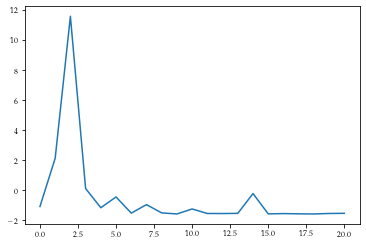

In [12]:
instance_id = 0

plt.plot(lcb2_regret_lists[instance_id, :])
plt.plot(lcb2_constrs_lists[instance_id, :])
plt.legend(['Regret', 'Constraint'])

In [ ]:
%matplotlib inline
_, total_steps = pdbo_regret_lists.shape
plt.figure()
plt.plot(np.cumsum(np.mean(np.squeeze(con_bo_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.squeeze(safe_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.squeeze(pdbo_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.squeeze(lcb2_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.xlabel('Steps')
plt.ylabel('Average Regret')
#plt.ylim((0, 0.4))
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
#plt.savefig('./fig/sample_SE_ave_regret.pdf', format='pdf')
plt.show()

plt.figure()
plt.plot(np.cumsum(np.mean(np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.xlabel('Steps')
plt.ylabel('Average Violation')
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
#plt.savefig('./fig/sample_SE_ave_vio.pdf', format='pdf')
plt.show()



In [ ]:
energy_mean = 385.3506855413606
energy_std = 15.832128159177238
dev_mean = 0.48119964518630765
dev_std = 0.016940298884339722

# draw cumulative regret

In [13]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','green','purple', 'orange', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = None #ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = con_bo_constrs_lists[i,j][0]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
#     con_bo_regret_lists = con_bo_regret_lists.astype(float)
#     safe_regret_lists = safe_regret_lists.astype(float)
#     pdbo_regret_lists = pdbo_regret_lists.astype(float)
#     lcb2_regret_lists = lcb2_regret_lists.astype(float)
#     con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
#     safe_constrs_lists = safe_constrs_lists.astype(float)
#     pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
#     lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    step_arr = np.arange(total_steps)
    con_bo_cumu_sum = np.cumsum(np.mean((con_bo_regret_lists*energy_std+energy_mean), axis=0))/np.arange(1, total_steps+1)
    safe_bo_cumu_sum = np.cumsum(np.mean((safe_regret_lists*energy_std+energy_mean), axis=0))/np.arange(1, total_steps+1)
    pdbo_cumu_sum = np.cumsum(np.mean((pdbo_regret_lists*energy_std+energy_mean), axis=0))/np.arange(1, total_steps+1)
    lcb2_cumu_sum = np.cumsum(np.mean((lcb2_regret_lists*energy_std+energy_mean), axis=0))/np.arange(1, total_steps+1)
    #print(con_bo_regret_lists)
    con_bo_cumu_sd = np.std(np.cumsum((con_bo_regret_lists), axis=1), axis=0)
    safe_bo_cumu_sd = np.std(np.cumsum((safe_regret_lists), axis=1), axis=0)
    pdbo_cumu_sd = np.std(np.cumsum((pdbo_regret_lists), axis=1), axis=0)
    lcb2_cumu_sd = np.std(np.cumsum((lcb2_regret_lists), axis=1), axis=0)
    print(con_bo_cumu_sum, safe_bo_cumu_sum)
    
    con_bo_vio = np.cumsum(np.mean(np.maximum((con_bo_constrs_lists), 0)*dev_std, axis=0))
    safe_bo_vio = np.cumsum(np.mean(np.maximum(-(safe_constrs_lists), 0)*dev_std, axis=0))
    pdbo_vio = np.cumsum(np.mean(np.maximum((pdbo_constrs_lists), 0)*dev_std, axis=0))
    lcb2_vio = np.cumsum(np.mean(np.maximum((lcb2_constrs_lists), 0)*dev_std, axis=0))
    
    con_bo_vio_sd = np.std(np.cumsum(np.maximum((con_bo_constrs_lists),0), axis=1), axis=0)
    safe_bo_vio_sd = np.std(np.cumsum(np.maximum((safe_constrs_lists), 0), axis=1), axis=0)
    pdbo_vio_sd = np.std(np.cumsum(np.maximum((pdbo_constrs_lists),0), axis=1), axis=0)
    lcb2_vio_sd = np.std(np.cumsum(np.maximum((lcb2_constrs_lists),0), axis=1), axis=0)
    
    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(2, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 2.4)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes[0]
    BETA1 = 0.2
    plot_with_shade_area(ax, step_arr, con_bo_cumu_sum, BETA1*con_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, safe_bo_cumu_sum, BETA1*safe_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, pdbo_cumu_sum, BETA1*pdbo_cumu_sd, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, lcb2_cumu_sum, BETA1*lcb2_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)

    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Cumulative Energy', fontsize=LABELSIZE)  

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    ax = axes[1]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 0.2
    plot_with_shade_area(ax, step_arr, con_bo_vio, BETA2*con_bo_vio_sd, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, safe_bo_vio, BETA2*safe_bo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, pdbo_vio, BETA2*pdbo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, lcb2_vio, BETA2*lcb2_vio_sd,
                        linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None')
   
    ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'], loc='lower center', bbox_to_anchor=(0.29, -0.6, 0.5, 0.5),
             ncol=4)

    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Cumulative Deviation', fontsize=LABELSIZE)
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/building_funcs_cumu.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


NameError: name 'energy_std' is not defined

# draw approximately feasible optimal solution

In [14]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = None #ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #print(con_bo_regret_lists)
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = [con_bo_constrs_lists[i,j][0], con_bo_constrs_lists[i,j][0]]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
    print(con_bo_regret_lists)
#     con_bo_regret_lists = con_bo_regret_lists.astype(float)
#     safe_regret_lists = safe_regret_lists.astype(float)
#     pdbo_regret_lists = pdbo_regret_lists.astype(float)
#     lcb2_regret_lists = lcb2_regret_lists.astype(float)
    
#     print(con_bo_constrs_lists)
#     con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
#     safe_constrs_lists = safe_constrs_lists.astype(float)
#     pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
#     lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    step_arr = np.arange(total_steps)
    
    shift = 0 # energy_mean/energy_std+dev_mean/dev_std
    con_bo_best_regret_constr_lists = np.minimum.accumulate(np.squeeze(con_bo_regret_lists) + np.maximum(np.squeeze(con_bo_constrs_lists), 0)+shift, axis=0)
    safe_best_regret_constr_lists = np.minimum.accumulate(np.squeeze(safe_regret_lists) + np.maximum(np.squeeze(safe_constrs_lists), 0)+shift, axis=0)
    pdbo_best_regret_constr_lists = np.minimum.accumulate(np.squeeze(pdbo_regret_lists) + np.maximum(np.squeeze(pdbo_constrs_lists), 0)+shift, axis=0)
    lcb2_best_regret_constr_lists = np.minimum.accumulate(np.squeeze(lcb2_regret_lists) + np.maximum(np.squeeze(lcb2_constrs_lists), 0)+shift, axis=0)
    
    #con_bo_best_regret_constr_lists_mean = np.mean(con_bo_best_regret_constr_lists, axis=0)
    #safe_best_regret_constr_lists_mean = np.mean(safe_best_regret_constr_lists, axis=0)
    #pdbo_best_regret_constr_lists_mean = np.mean(pdbo_best_regret_constr_lists, axis=0)
    #lcb2_best_regret_constr_lists_mean = np.mean(lcb2_best_regret_constr_lists, axis=0)
    
    #con_bo_best_regret_constr_lists_sd = np.std(con_bo_best_regret_constr_lists, axis=0)
    #safe_best_regret_constr_lists_sd = np.std(safe_best_regret_constr_lists, axis=0)
    #pdbo_best_regret_constr_lists_sd = np.std(pdbo_best_regret_constr_lists, axis=0)
    #lcb2_best_regret_constr_lists_sd = np.std(lcb2_best_regret_constr_lists, axis=0)
    
    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes
    BETA1 = 0.2
    print(step_arr.shape, con_bo_best_regret_constr_lists.shape)
    plt.plot( step_arr, con_bo_best_regret_constr_lists,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    plt.plot( step_arr, safe_best_regret_constr_lists,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plt.plot( step_arr, pdbo_best_regret_constr_lists, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    plt.plot( step_arr, lcb2_best_regret_constr_lists,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)

    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Best normalized energy \n plus normalized deviation', fontsize=LABELSIZE)  

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    
   
    ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'CONFIG'], loc='lower center', bbox_to_anchor=(0.29, -0.6, 0.5, 0.5),
             ncol=4)

    
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/building_funcs_r_and_v.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


[[array([[-1.06445712]]) array([[1.07134839]]) array([[-1.36656988]])
  array([[-1.4522185]]) array([[0.4558971]]) array([[-1.49007457]])
  array([[-1.55411484]]) array([[-1.55550823]]) array([[-0.97274476]])
  array([[6.58344756]]) array([[-1.56649103]]) array([[-1.57030061]])
  array([[-1.54398192]]) array([[-0.81109685]]) array([[-1.3726427]])
  array([[-1.05891814]]) array([[2.40073369]]) array([[1.45959354]])
  array([[1.43512509]]) array([[1.4666485]]) array([[1.47147356]])]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

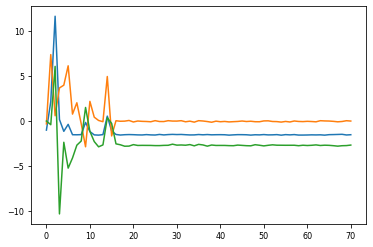

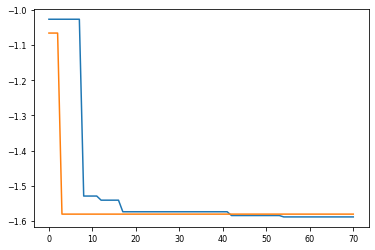

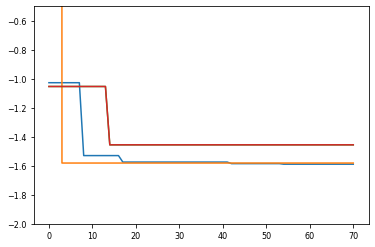

In [112]:
plt.plot(lcb2_regret_lists[0, :])
plt.plot(lcb2_constrs_lists[0, :,0]*100)
plt.plot(lcb2_constrs_lists[0, :,1]*100)
plt.figure()
plt.plot(np.minimum.accumulate(lcb2_regret_lists[0,:]+np.maximum(lcb2_constrs_lists[0, :,0],0)*100+np.maximum(lcb2_constrs_lists[0, :,1],0)*100))
#plt.figure()
plt.plot(np.minimum.accumulate(con_bo_regret_lists[0,:]+np.maximum(con_bo_constrs_lists[0, :,0],0)*100+np.maximum(con_bo_constrs_lists[0, :,1],0)*100))

plt.figure()
plt.plot(np.minimum.accumulate(lcb2_regret_lists[0,:]+(lcb2_constrs_lists[0, :,0]>0)*100+(lcb2_constrs_lists[0, :,1]>0)*100))
plt.ylim((-2, -0.5))
plt.plot(np.minimum.accumulate(con_bo_regret_lists[0,:]+(con_bo_constrs_lists[0, :,0]>0)*100+(con_bo_constrs_lists[0, :,1]>0)*100))
plt.plot(np.minimum.accumulate(pdbo_regret_lists[0,:]+(pdbo_constrs_lists[0, :,0]>0)*100+(pdbo_constrs_lists[0, :,1]>0)*100))

plt.plot(np.minimum.accumulate(pdbo_regret_lists[0,:]+(pdbo_constrs_lists[0, :,0]>0)*100+(pdbo_constrs_lists[0, :,1]>0)*100))
plt.plot(np.minimum.accumulate(safe_regret_lists[0,:]+(safe_constrs_lists[0, :,0]>0)*100+(safe_constrs_lists[0, :,1]>0)*100))


In [87]:
pdbo_regret_lists

array([[array([[-1.03454064]]), array([[3.42311901]]),
        array([[-0.92195379]]), array([[1.44622292]]),
        array([[2.16355824]]), array([[-1.5573616]]),
        array([[-1.49235233]]), array([[-0.47784957]]),
        array([[-1.58473769]]), array([[-1.29663284]]),
        array([[-0.90084411]]), array([[-1.51412123]]),
        array([[-1.56866839]]), array([[-1.51874968]]),
        array([[-1.39701621]]), array([[13.60932476]]),
        array([[0.53684444]]), array([[5.07779768]]),
        array([[3.44486939]]), array([[-0.15908947]]),
        array([[-1.07763861]])]], dtype=object)

In [69]:
con_bo_constrs_lists

array([[array([-3.94936469e-03, -2.88108530e-05]),
        array([[ 0.07388736, -0.00353841]]),
        array([[ 0.0245923, -0.0187629]]),
        array([[-0.00197582,  0.0234421 ]]),
        array([[-0.00315973, -0.02323035]]),
        array([[ 0.00035846, -0.02838582]]),
        array([[-0.01786733,  0.00129513]]),
        array([[-0.00054594, -0.02203163]]),
        array([[-0.00330834, -0.02305591]]),
        array([[ 0.04159702, -0.11176099]]),
        array([[-0.00322474, -0.0241465 ]]),
        array([[-0.01159612, -0.00977253]]),
        array([[-0.00193617, -0.01952833]]),
        array([[ 0.00035713, -0.00152998]]),
        array([[ 0.06104756, -0.05305145]]),
        array([[0.05859181, 0.01850483]]),
        array([[-0.04299332,  0.03255095]]),
        array([[-0.04346138,  0.03305277]]),
        array([[-0.04402834,  0.03370261]]),
        array([[-0.04317527,  0.03314148]]),
        array([[-0.04423326,  0.03343249]])]], dtype=object)

In [29]:
con_bo_regret_lists

array([[0.5726755656629795, -0.49080027731601417, -0.7601551884800098,
        0.31218541175463965, -1.647168328432878, -0.5263096314219612,
        -0.1890562551059652, -0.3365635981838877, 0.3302332248700683,
        -0.3012995639289051, -0.16154318627421185, -0.04653999707305119,
        -2.102825350863704, -0.43917674081841823, -0.05563978575264143,
        -0.3795579524626514, 0.29002375343720566, -1.913209786724782,
        0.0603101826397721, 0.8796729496758634, 0.4717203592210083]],
      dtype=object)

In [30]:
safe_constrs_lists

array([[[1.4641756293756352],
        [1.4634305266969903],
        [1.4634305266969903],
        [1.4634305266969903],
        [1.4634305266969903],
        [1.4634305266969903],
        [1.4634305266969903],
        [-15.895441834918625],
        [-3.1951709906403187],
        [-2.299598140573024],
        [-3.1075353682056903],
        [-2.299598140573024],
        [-0.2951112245621323],
        [-2.299598140573024],
        [-0.2951112245621323],
        [-3.1075353682056903],
        [-0.2951112245621323],
        [1.4634305266969903],
        [1.4634305266969903],
        [-3.0719924915686976],
        [-3.1951709906403187]]], dtype=object)

In [14]:
plt.plot(lcb2_regret_lists[0, :, 0, 0])
#plt.plot(safe_regret_lists[0, :, 0, 0])

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

['Safe BO', 'Generic Constrained BO', 'Violation Aware BO 0.0', 'Violation Aware BO 10.0', 'Violation Aware BO 20.0']


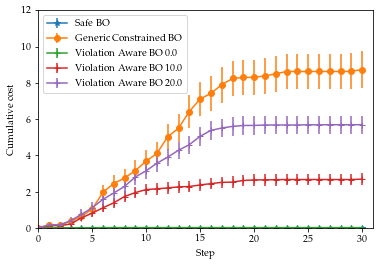

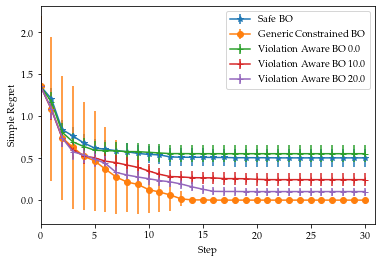

In [69]:
plot_results(safe_ave_cost_arr, safe_ave_simple_regret_arr, con_ave_cost_arr, con_ave_simple_regret_arr, vabo_ave_cost_arr_set,
            vabo_ave_simple_regret_arr_set, safe_cost_lists, safe_simple_regret_lists, 
            con_bo_cost_lists, con_bo_simple_regret_lists, vabo_cost_lists,
            vabo_simple_regret_lists)

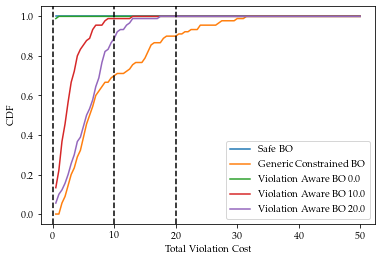

In [47]:
import pandas as pd

def cdf_plot(data, bins=100, hist_range=(0, 50)):
    count, bins_count = np.histogram(data, bins=bins, range=hist_range)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF")


cdf_plot(safe_cost_lists[:, -1, 0])
cdf_plot(con_bo_cost_lists[:, -1, 0])
cdf_plot(vabo_cost_lists[0, :, -1, 0])
cdf_plot(vabo_cost_lists[1, :, -1, 0])
cdf_plot(vabo_cost_lists[2, :, -1, 0])

plt.legend(['Safe BO', 'Generic Constrained BO','Violation Aware BO $0.0$', 'Violation Aware BO $10.0$', 'Violation Aware BO $20.0$'])
plt.xlabel('Total Violation Cost')
plt.ylabel('CDF')
plt.axvline(x=0, linestyle='--', color='0')
plt.axvline(x=10, linestyle='--', color='0')
plt.axvline(x=20, linestyle='--', color='0')
plt.savefig('./fig/total_vio_cost_CDF.pdf', format='pdf')

In [33]:
vabo_cost_lists.shape

(3, 90, 31, 1)

In [13]:
def plot_cost_SR_scatter(cost_lists, SR_lists, fig_name=None):
    cost_arr = np.array(cost_lists)
    num_tra, num_eval, num_constr = cost_arr.shape
    
    SR_arr = np.array(SR_lists)
    
    for i in range(num_constr):
        plt.figure()
        plt.scatter(cost_arr[:,-1,i], SR_arr[:,-1])
        plt.xlabel('Violation cost '+str(i+1))
        plt.ylabel('Simple regret')
        plt.title(fig_name)
    
    if fig_name is not None:
        plt.savefig('./fig/'+fig_name, format='png')


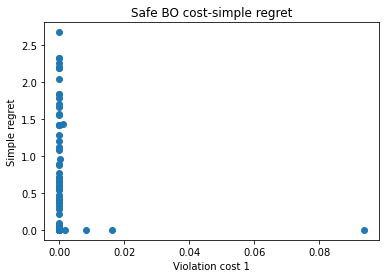

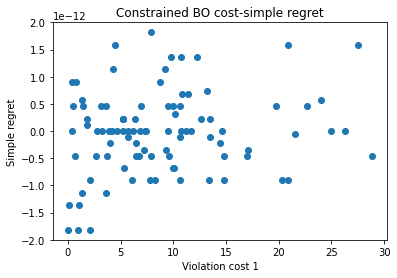

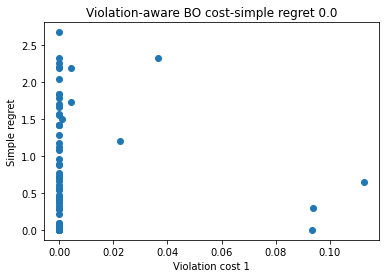

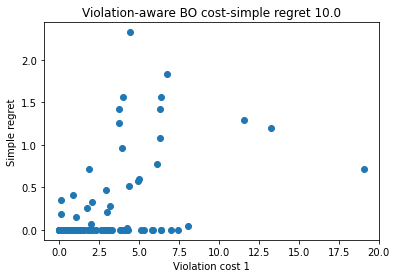

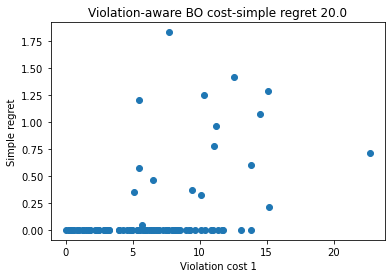

In [14]:
plot_cost_SR_scatter(safe_cost_lists, safe_simple_regret_lists, 'Safe BO cost-simple regret')
plot_cost_SR_scatter(con_bo_cost_lists, con_bo_simple_regret_lists, 'Constrained BO cost-simple regret')
plot_cost_SR_scatter(vabo_cost_lists_set[0], vabo_simple_regret_lists_set[0], 'Violation-aware BO cost-simple regret 0.0')
plot_cost_SR_scatter(vabo_cost_lists_set[1], vabo_simple_regret_lists_set[1], 'Violation-aware BO cost-simple regret 10.0')
plot_cost_SR_scatter(vabo_cost_lists_set[2], vabo_simple_regret_lists_set[2], 'Violation-aware BO cost-simple regret 20.0')


In [23]:
def sample_funcs(problem_name, sampled_number):
    parameter_set = None
    sampled_funcs_list = []
    for k in range(sampled_number):
        config = util.get
    

[[array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.])],
 [array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.])],
 [array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.])],
 [array([0.]),
  array([0.]),
  array([0.]),
  array

In [24]:
import merl_model.steady_state_analyze as MERL_model

ModuleNotFoundError: No module named 'fmu_simulator'